In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import os

base_path = '/content/drive/MyDrive/healthcarefraud_detection'

folders = [
    f'{base_path}/data/raw',
    f'{base_path}/data/processed',
    f'{base_path}/models',
    f'{base_path}/reports',
    f'{base_path}/notebooks',
    f'{base_path}/src'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folders created:")
for folder in folders:
    print(folder)


Folders created:
/content/drive/MyDrive/healthcarefraud_detection/data/raw
/content/drive/MyDrive/healthcarefraud_detection/data/processed
/content/drive/MyDrive/healthcarefraud_detection/models
/content/drive/MyDrive/healthcarefraud_detection/reports
/content/drive/MyDrive/healthcarefraud_detection/notebooks
/content/drive/MyDrive/healthcarefraud_detection/src


In [10]:
base_path = '/content/drive/MyDrive/healthcarefraud_detection/data/raw'

train = pd.read_csv(f'{base_path}/Train.csv')
test = pd.read_csv(f'{base_path}/Test.csv')
train_bene = pd.read_csv(f'{base_path}/Train_Beneficiarydata.csv')
test_bene = pd.read_csv(f'{base_path}/Test_Beneficiarydata.csv')
train_inp = pd.read_csv(f'{base_path}/Train_Inpatientdata.csv')
test_inp = pd.read_csv(f'{base_path}/Test_Inpatientdata.csv')
train_out = pd.read_csv(f'{base_path}/Train_Outpatientdata.csv')
test_out = pd.read_csv(f'{base_path}/Test_Outpatientdata.csv')



In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [17]:
print("Test.csv")
print(test.info())
print(test.isnull().sum())
print("Train_Beneficiarydata.csv")
print(train_bene.info())
print(train_bene.isnull().sum())

print("Train_Inpatientdata.csv")
print(train_inp.info())
print(train_inp.isnull().sum())

print("Train_Outpatientdata.csv")
print(train_out.info())
print(train_out.isnull().sum())


Test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB
None
Provider    0
dtype: int64
Train_Beneficiarydata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7 

In [18]:
print("Providers in train:", train['Provider'].nunique())
print("Providers in inpatient:", train_inp['Provider'].nunique())
print("Providers in outpatient:", train_out['Provider'].nunique())

print("Unique beneficiaries in claims (inpatient):", train_inp['BeneID'].nunique())
print("Unique beneficiaries in claims (outpatient):", train_out['BeneID'].nunique())
print("Beneficiaries in beneficiary data:", train_bene['BeneID'].nunique())


Providers in train: 5410
Providers in inpatient: 2092
Providers in outpatient: 5012
Unique beneficiaries in claims (inpatient): 31289
Unique beneficiaries in claims (outpatient): 133980
Beneficiaries in beneficiary data: 138556


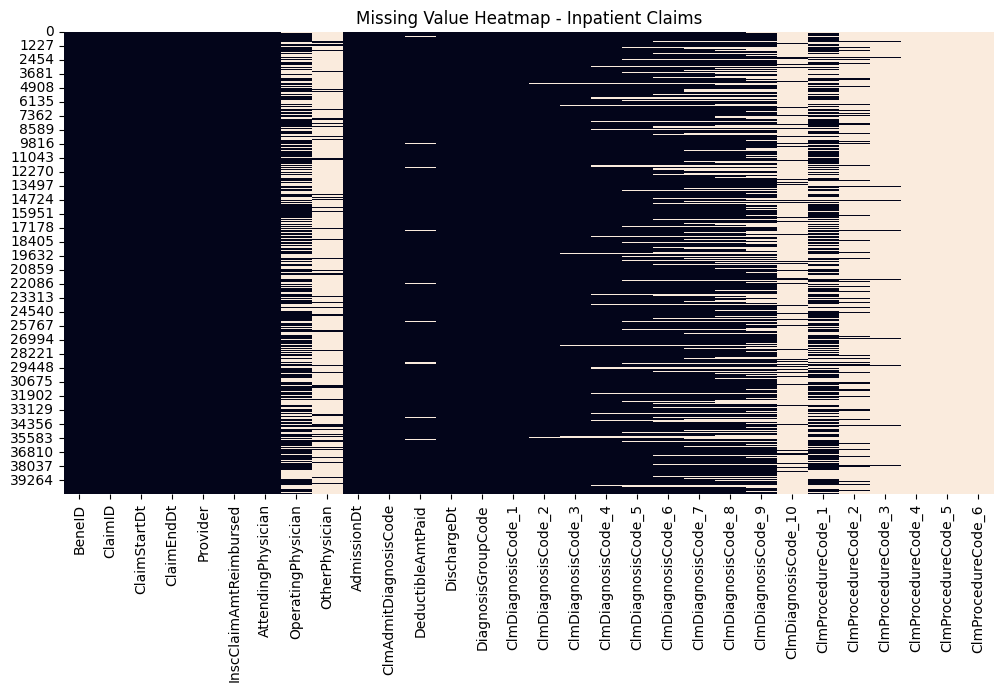

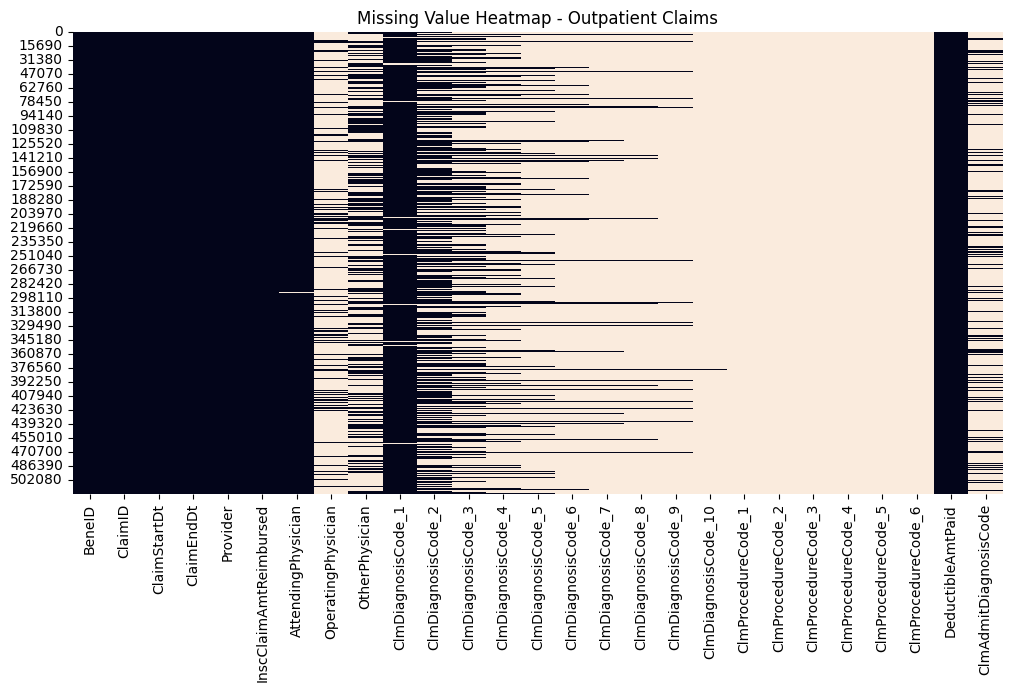

In [21]:
# For inpatient claims
plt.figure(figsize=(12, 6))
sns.heatmap(train_inp.isnull(), cbar=False)
plt.title("Missing Value Heatmap - Inpatient Claims")
plt.show()

# For outpatient claims
plt.figure(figsize=(12, 6))
sns.heatmap(train_out.isnull(), cbar=False)
plt.title("Missing Value Heatmap - Outpatient Claims")
plt.show()


In [22]:
def missing_summary(df):
    return (df.isnull().mean() * 100).sort_values(ascending=False)

print("Inpatient missing %:")
print(missing_summary(train_inp))
print("\nOutpatient missing %:")
print(missing_summary(train_out))


Inpatient missing %:
ClmProcedureCode_6        100.000000
ClmProcedureCode_5         99.977764
ClmProcedureCode_4         99.713396
ClmProcedureCode_3         97.615753
ClmDiagnosisCode_10        90.297475
OtherPhysician             88.412314
ClmProcedureCode_2         86.524683
ClmProcedureCode_1         42.807728
OperatingPhysician         41.122696
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_4          3.790087
DeductibleAmtPaid           2.221179
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_2          0.558383
AttendingPhysician          0.276721
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
InscClaimAmtReimbursed      0.000000
ClaimID                     0.000000
BeneID                      0.000000
ClmAdmitDiagnosisCode       0.000000
AdmissionDt                 0.000000
ClaimStartDt     